Initial Data:
         ID Case Number                    Date                   Block  IUCR  \
0  10278872    HY467389  10/18/2015 11:50:00 PM      060XX S VERNON AVE  0560   
1  10278895    HY467411  10/18/2015 11:50:00 PM         011XX E 82ND ST  0486   
2  10278866    HY467390  10/18/2015 11:50:00 PM         026XX E 83RD ST  1811   
3  10279273    HY467434  10/18/2015 11:40:00 PM         035XX E 97TH ST  041A   
4  10278909    HY467416  10/18/2015 11:36:00 PM  078XX S SOUTH SHORE DR  4388   

    Primary Type                   Description     Location Description  \
0        ASSAULT                        SIMPLE  RESIDENCE PORCH/HALLWAY   
1        BATTERY       DOMESTIC BATTERY SIMPLE                APARTMENT   
2      NARCOTICS  POSS: CANNABIS 30GMS OR LESS   DRIVEWAY - RESIDENTIAL   
3        BATTERY           AGGRAVATED: HANDGUN                 SIDEWALK   
4  OTHER OFFENSE   VIO BAIL BOND: DOM VIOLENCE                APARTMENT   

   Arrest  Domestic  ...  Ward  Community Area  

C:\Users\HDC0422270\AppData\Local\Temp\ipykernel_5080\715100587.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')


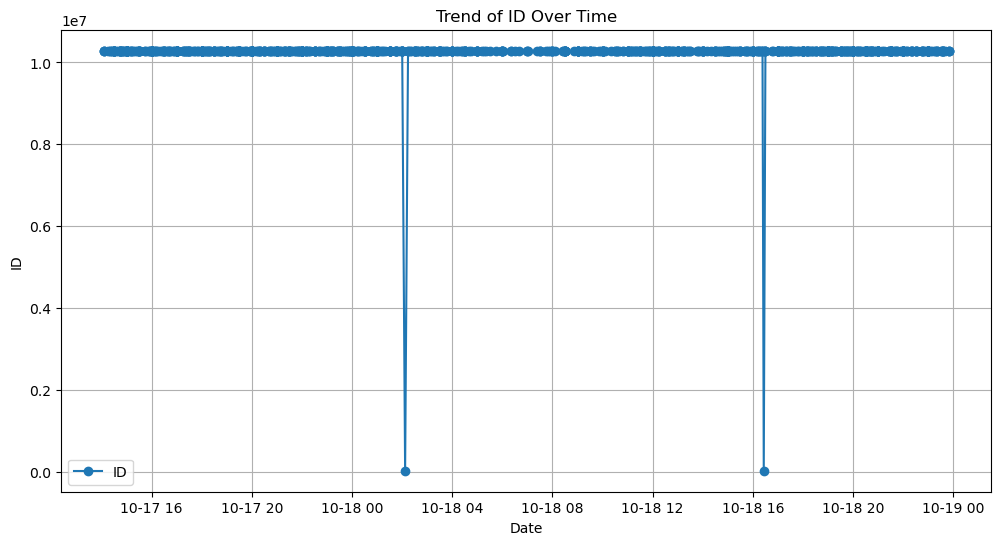

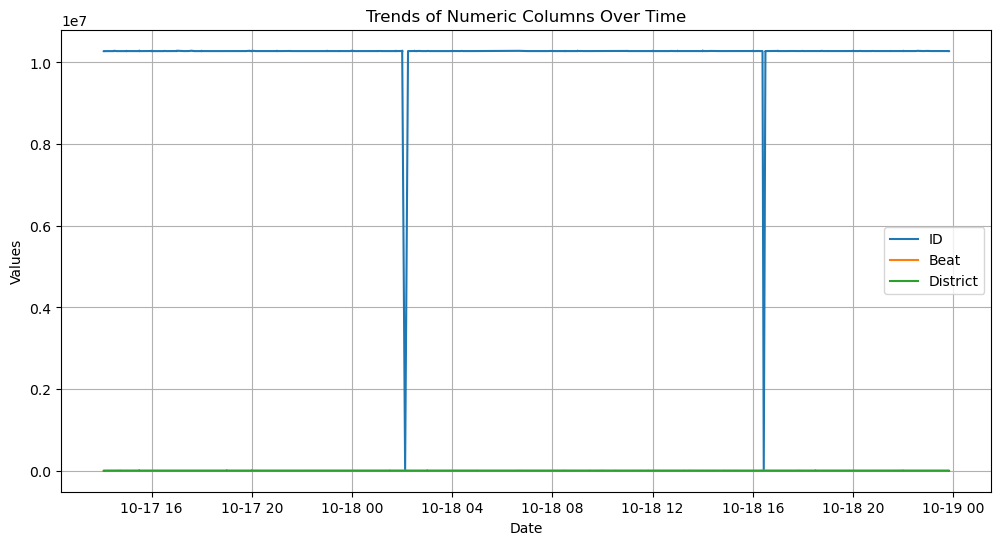

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\HDC0422270\Downloads\crime-data-1000.csv"  # Adjust the path
data = pd.read_csv(file_path)

# Display the first few rows and column names
print("Initial Data:")
print(data.head())
print("\nColumns:", data.columns)

# Step 1: Data Cleaning
# Replace invalid or missing values (e.g., NaN) with a default value
data = data.fillna(0)

# Step 2: Convert Date Column to Datetime
date_column = 'Date'  # Replace with the actual name of your date column
if date_column in data.columns:
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
    # Drop rows with invalid dates
    data = data.dropna(subset=[date_column])
    # Sort the data by date
    data = data.sort_values(by=date_column)
else:
    print(f"Warning: Column '{date_column}' not found!")


# Step 4: Plotting
# Check for key numeric columns for plotting (replace with actual column names)
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
print("\nNumeric Columns for Plotting:", numeric_columns)

if date_column in data.columns:
    plt.figure(figsize=(12, 6))
   
    # Example Plot 1: Trend of the first numeric column over time
    if numeric_columns:
        plt.plot(data[date_column], data[numeric_columns[0]], label=numeric_columns[0], marker='o')
        plt.title(f"Trend of {numeric_columns[0]} Over Time")
        plt.xlabel("Date")
        plt.ylabel(numeric_columns[0])
        plt.legend()
        plt.grid()
        plt.show()

    # Example Plot 2: Multiple numeric columns
    plt.figure(figsize=(12, 6))
    for col in numeric_columns[:3]:  # Limit to the first three numeric columns
        plt.plot(data[date_column], data[col], label=col)
    plt.title("Trends of Numeric Columns Over Time")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Cannot plot trends without a valid date column!")